In [1]:
%%capture
%run cowling_approximation/fModes.py

import h5py
from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
data = h5py.File('/Users/utkarsh/Downloads/LCEHL_EOS_posterior_samples_PSR+GW+NICER.h5', 'r') # EOS posterior conditioned on PSR observations
eos = data["eos"]
names = list(data["eos"].keys())

eos_0


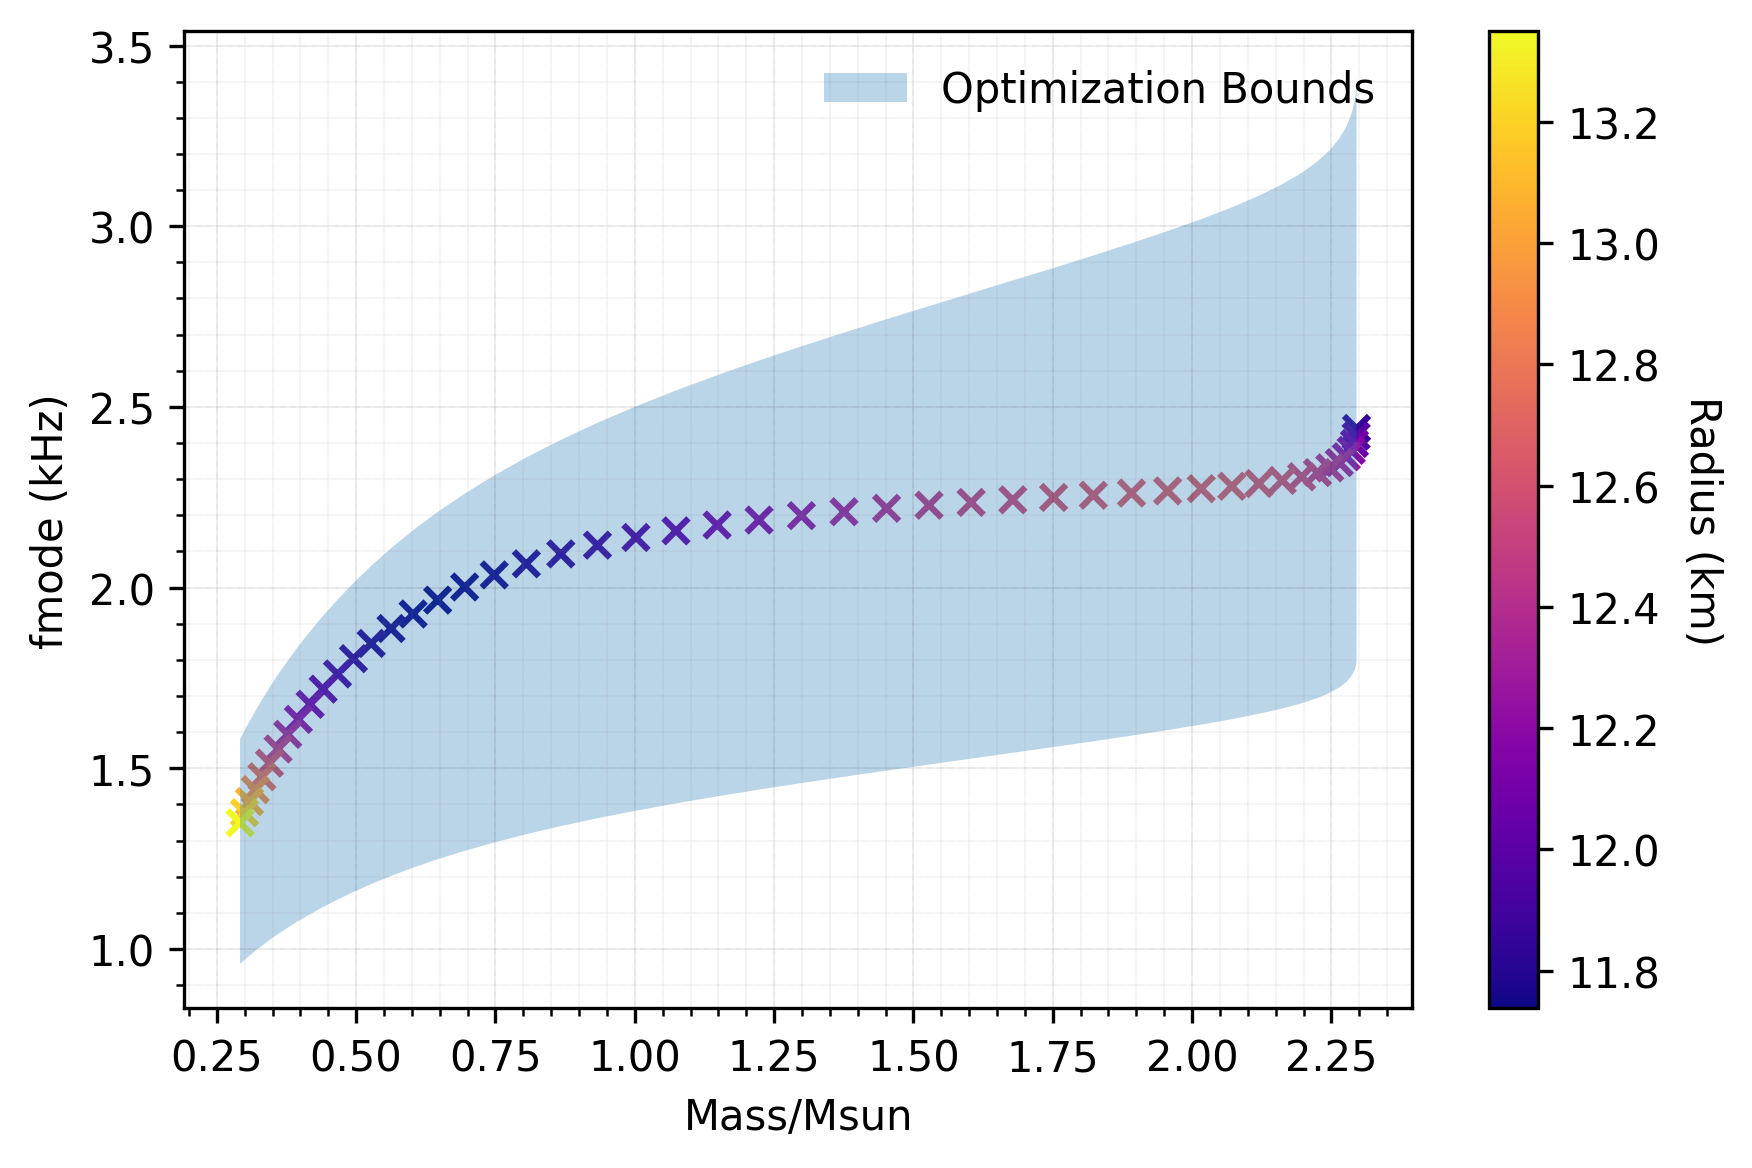

eos_1899


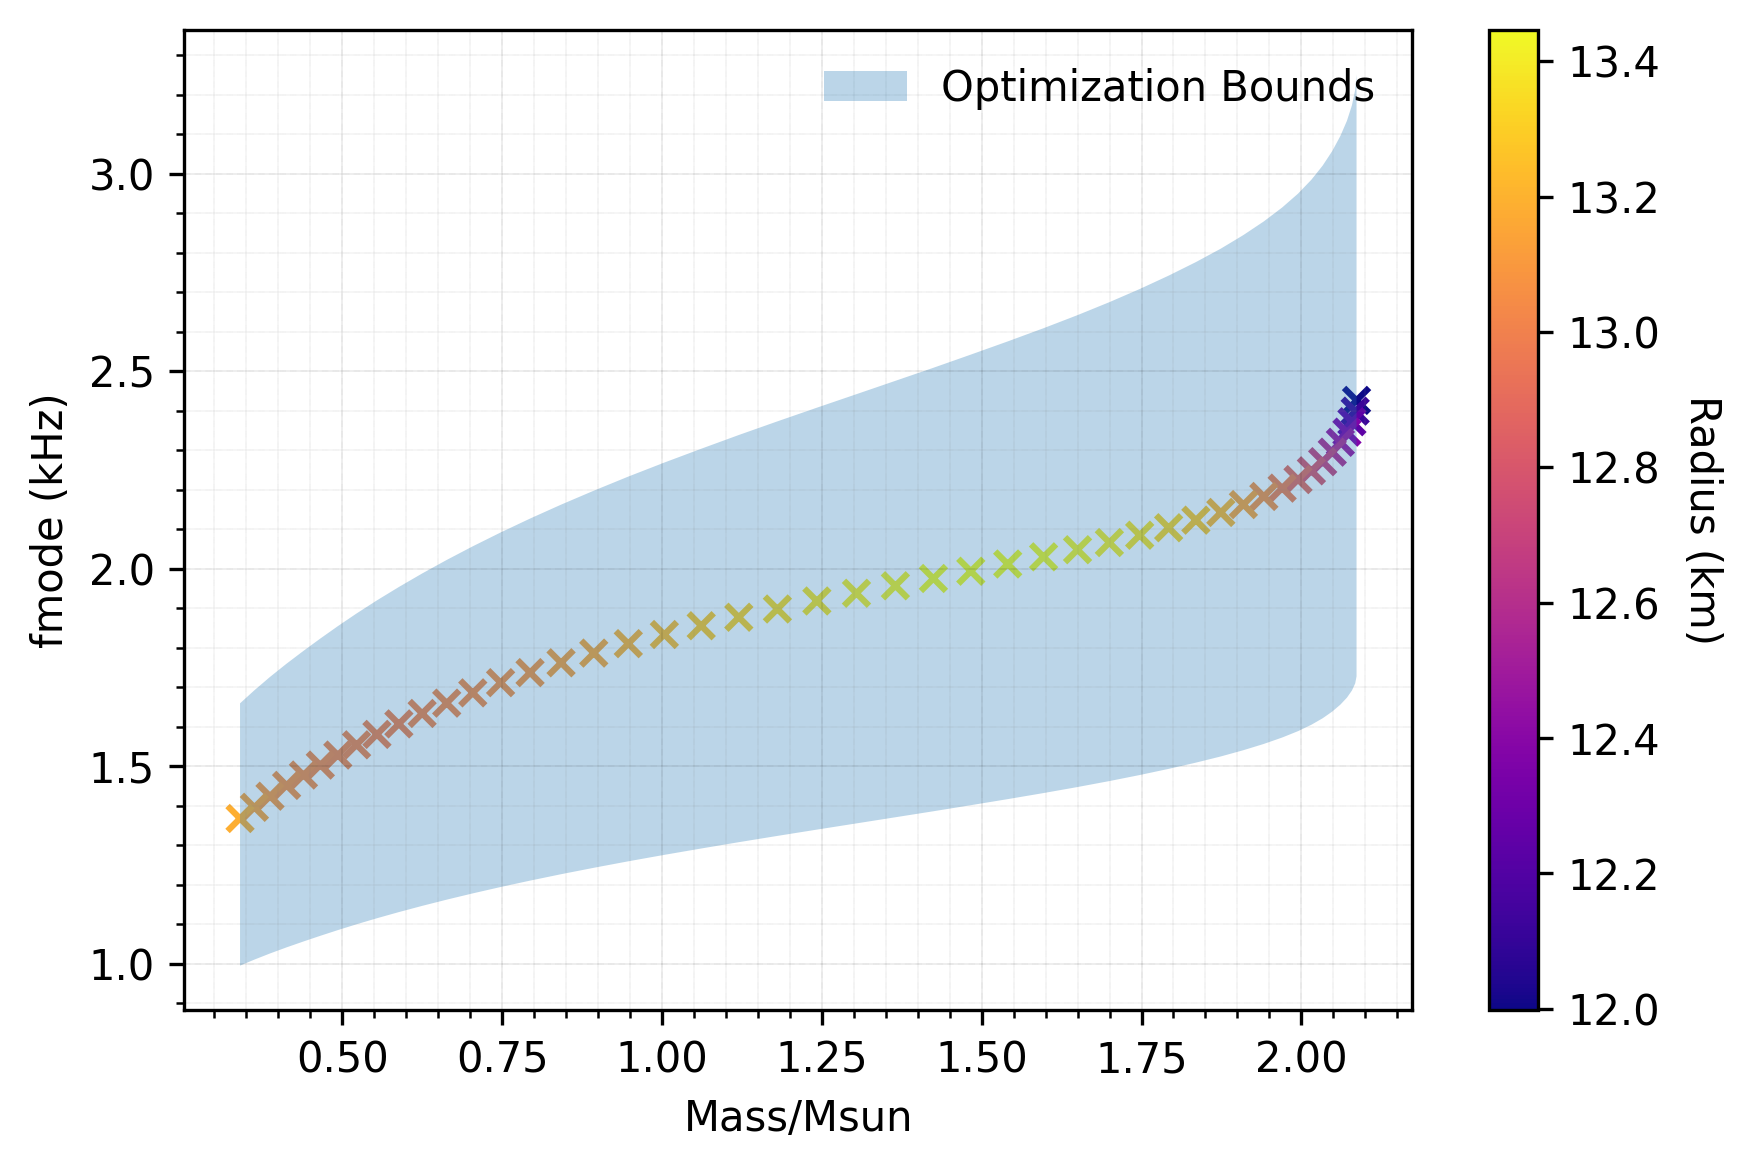

eos_2799


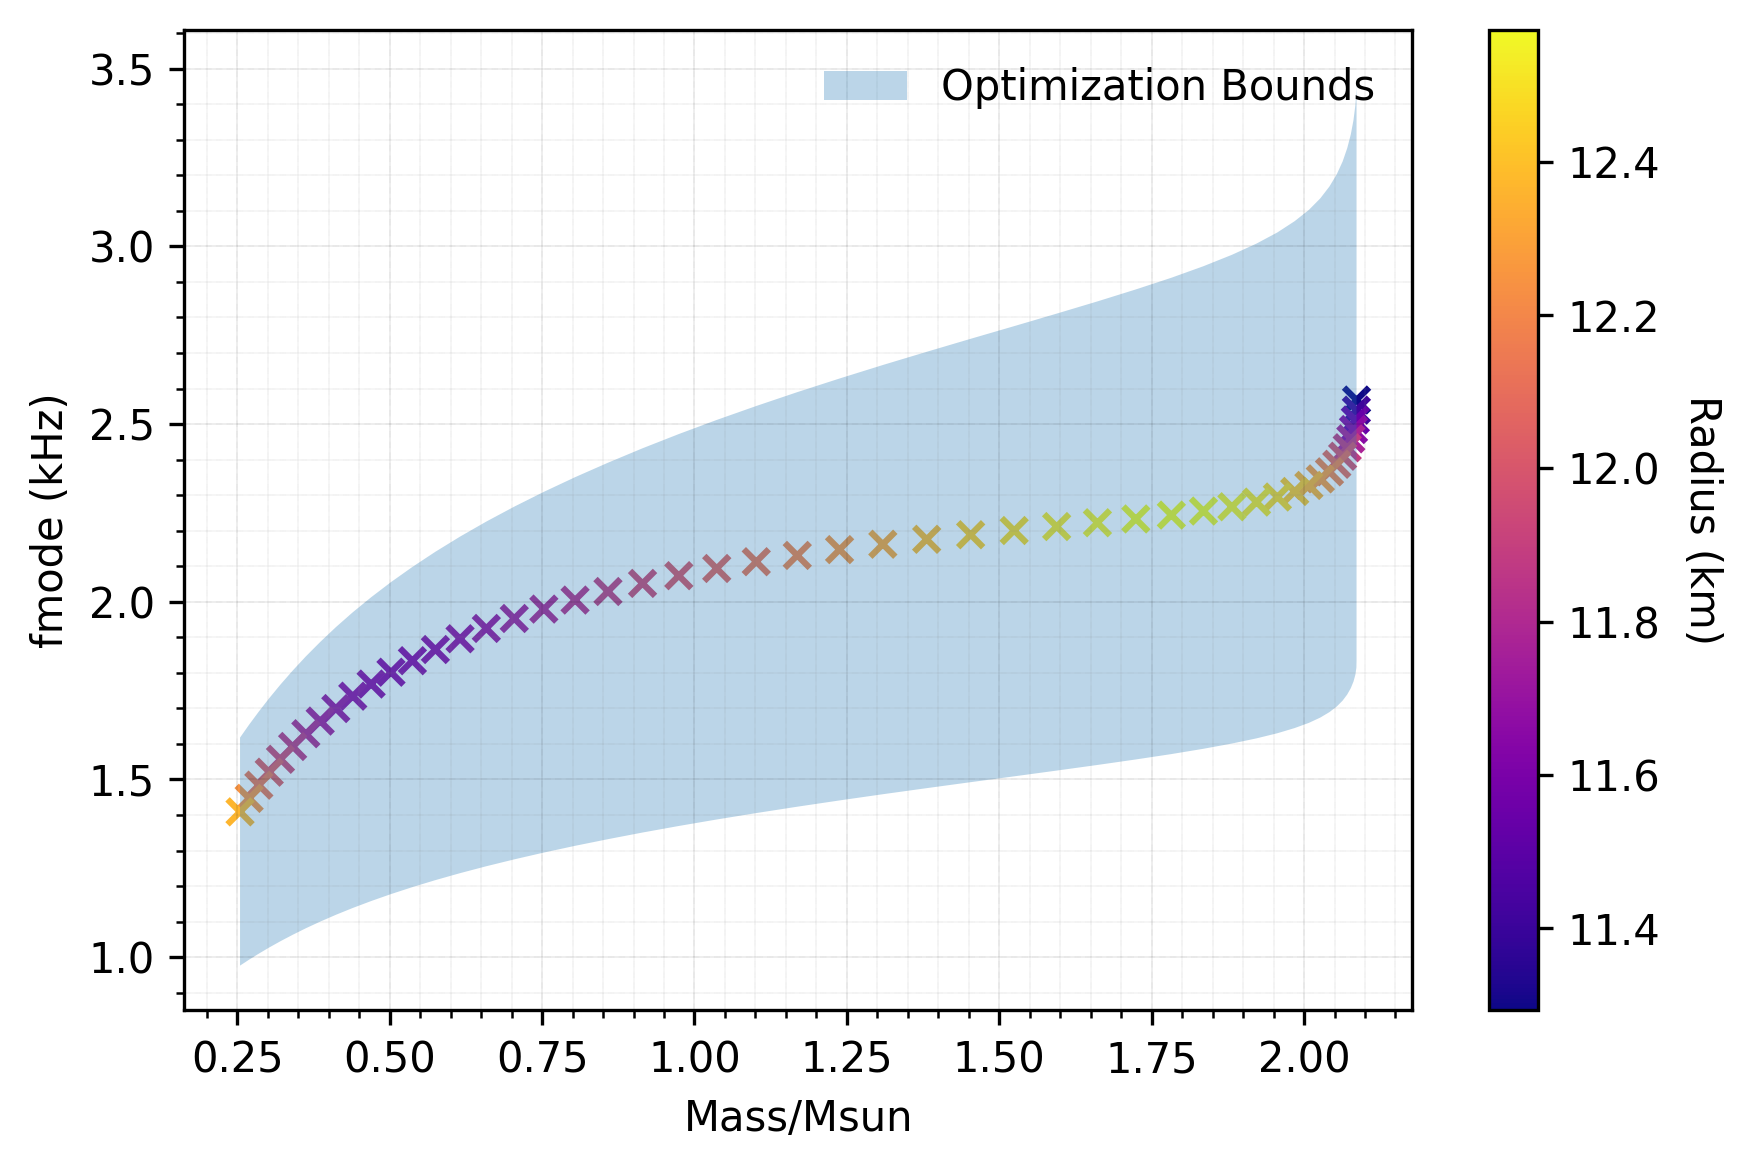

eos_3699


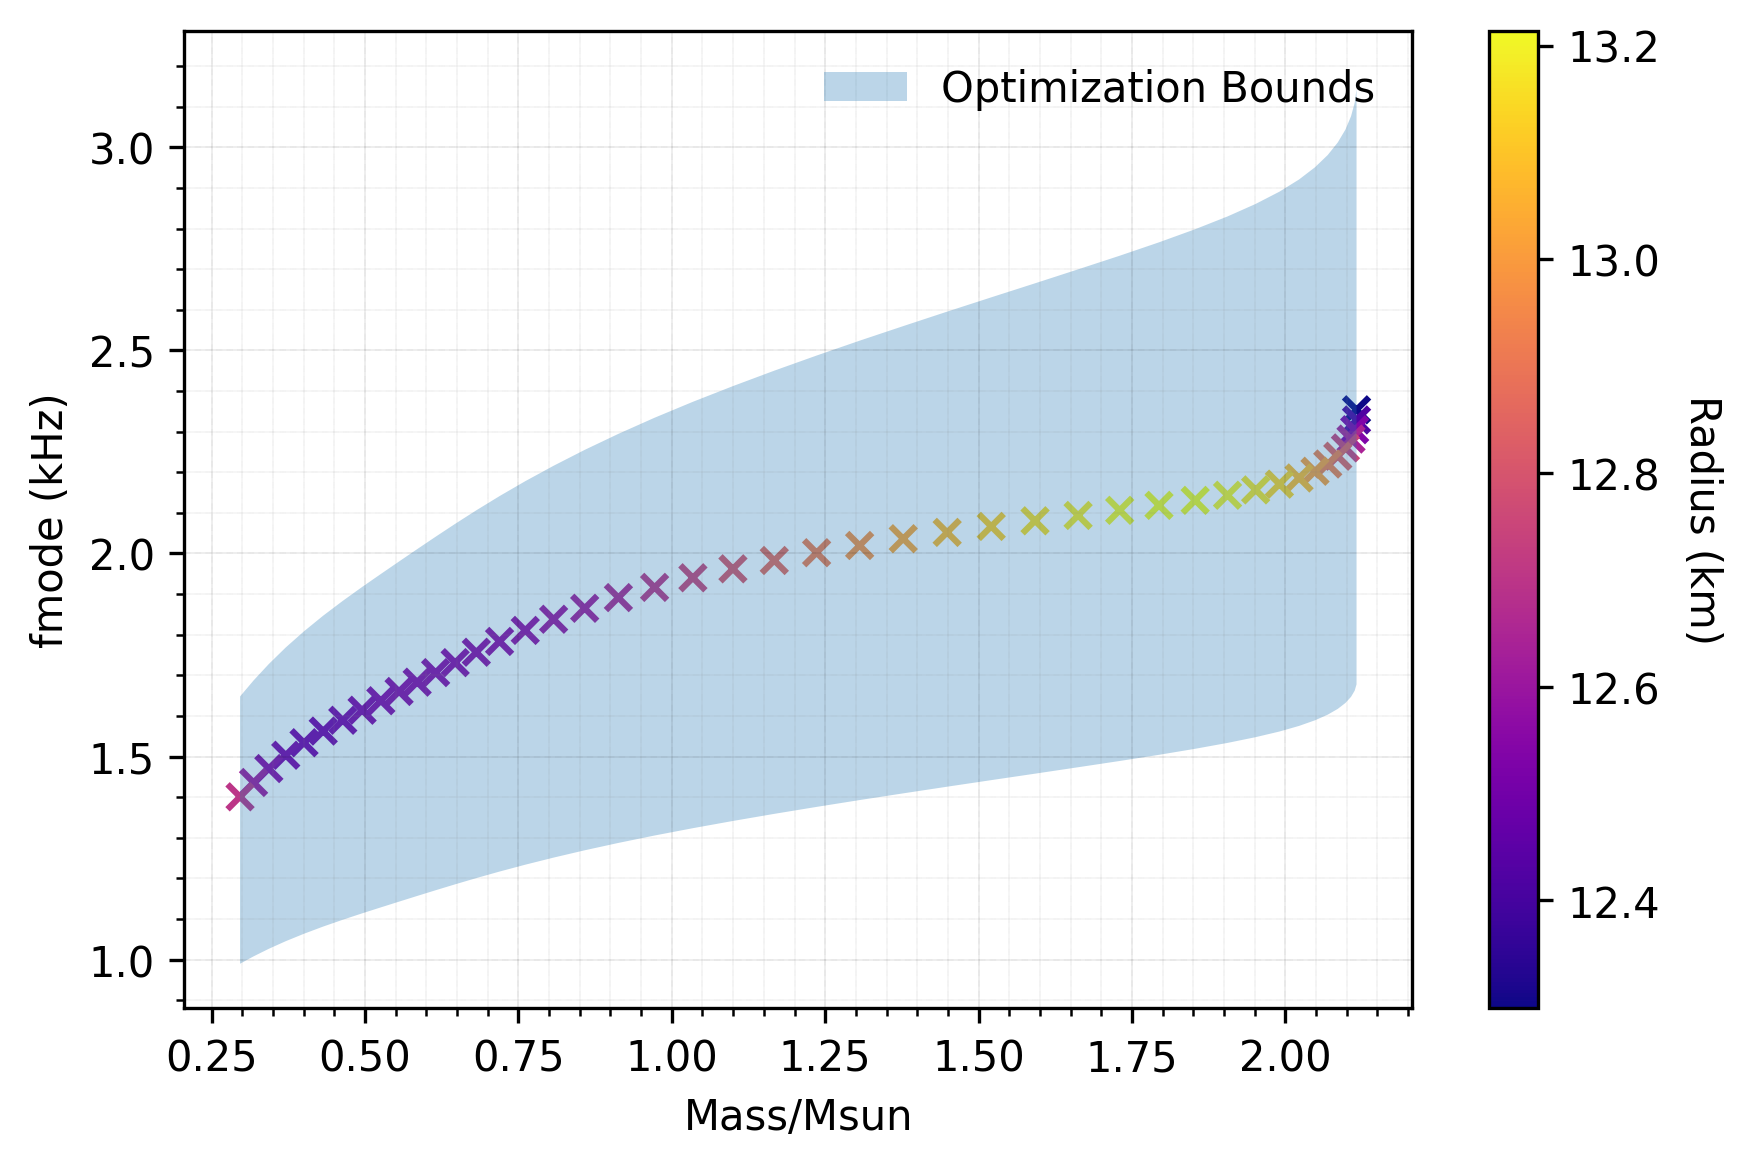

eos_4599


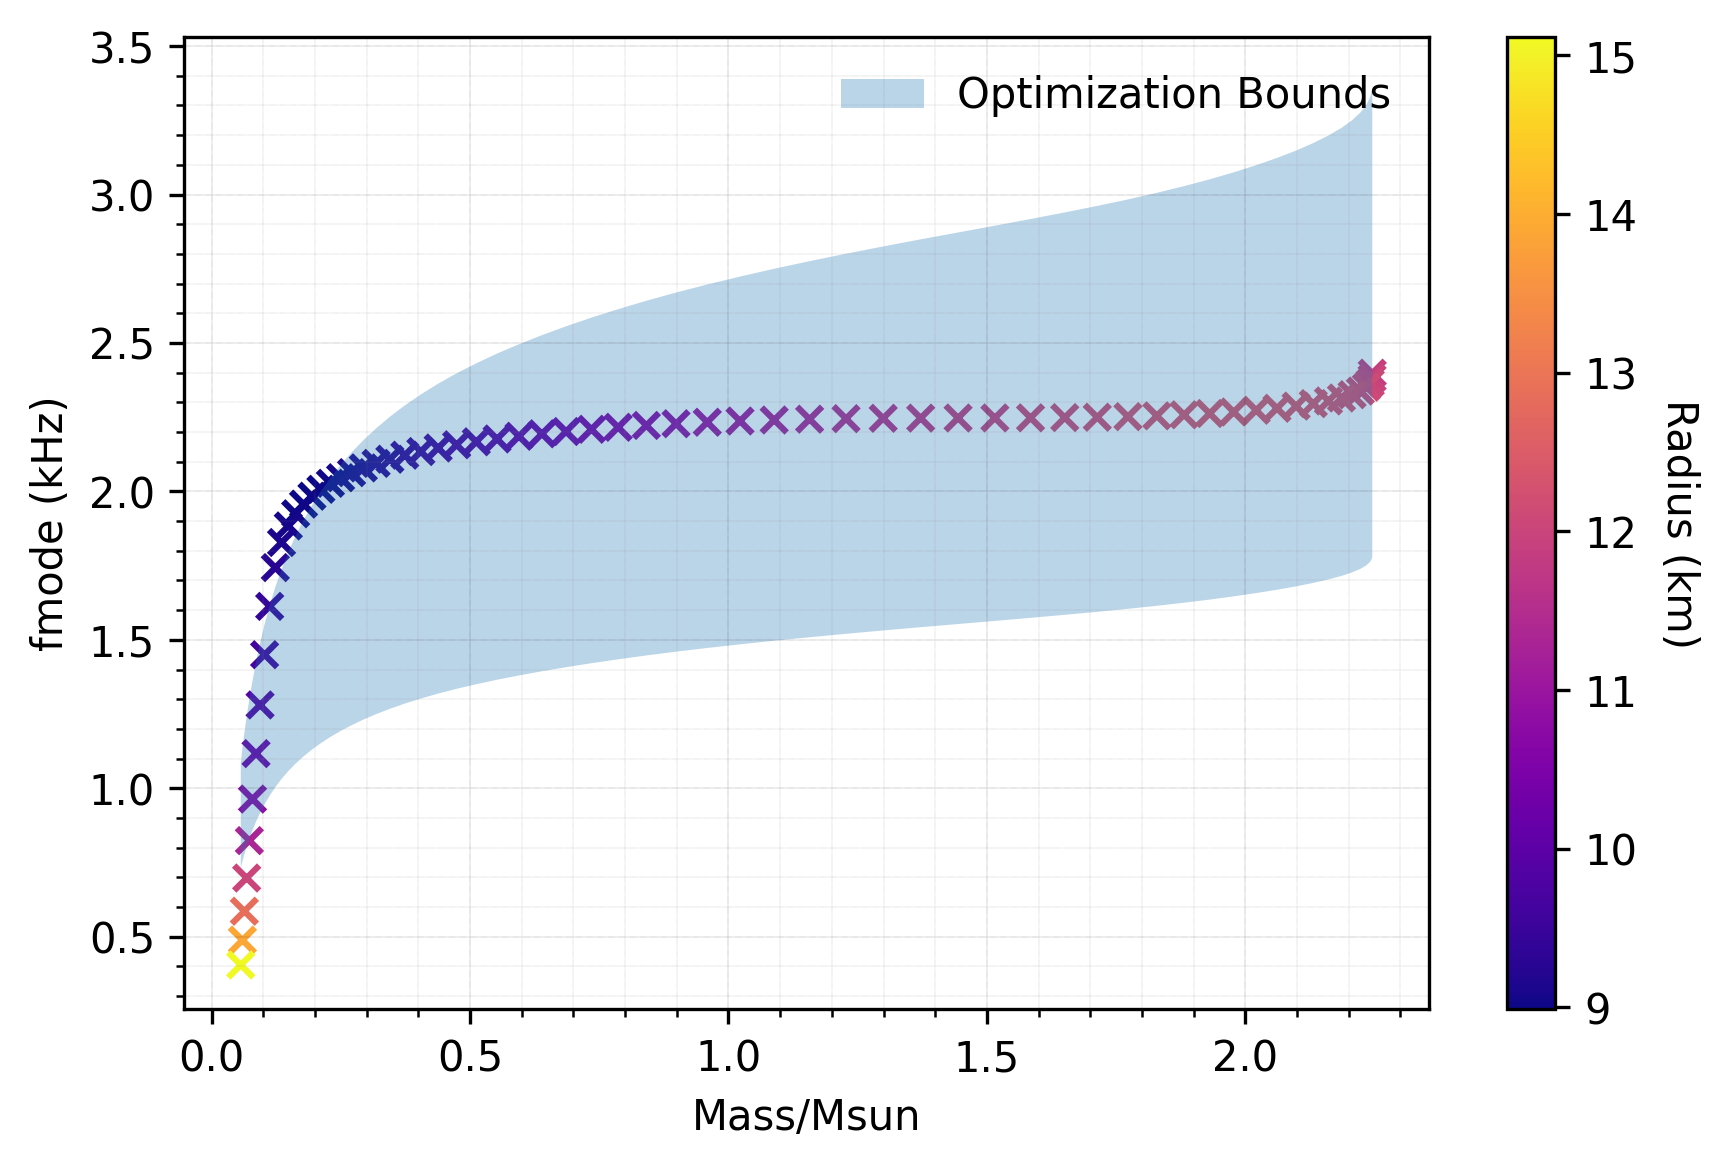

eos_5499


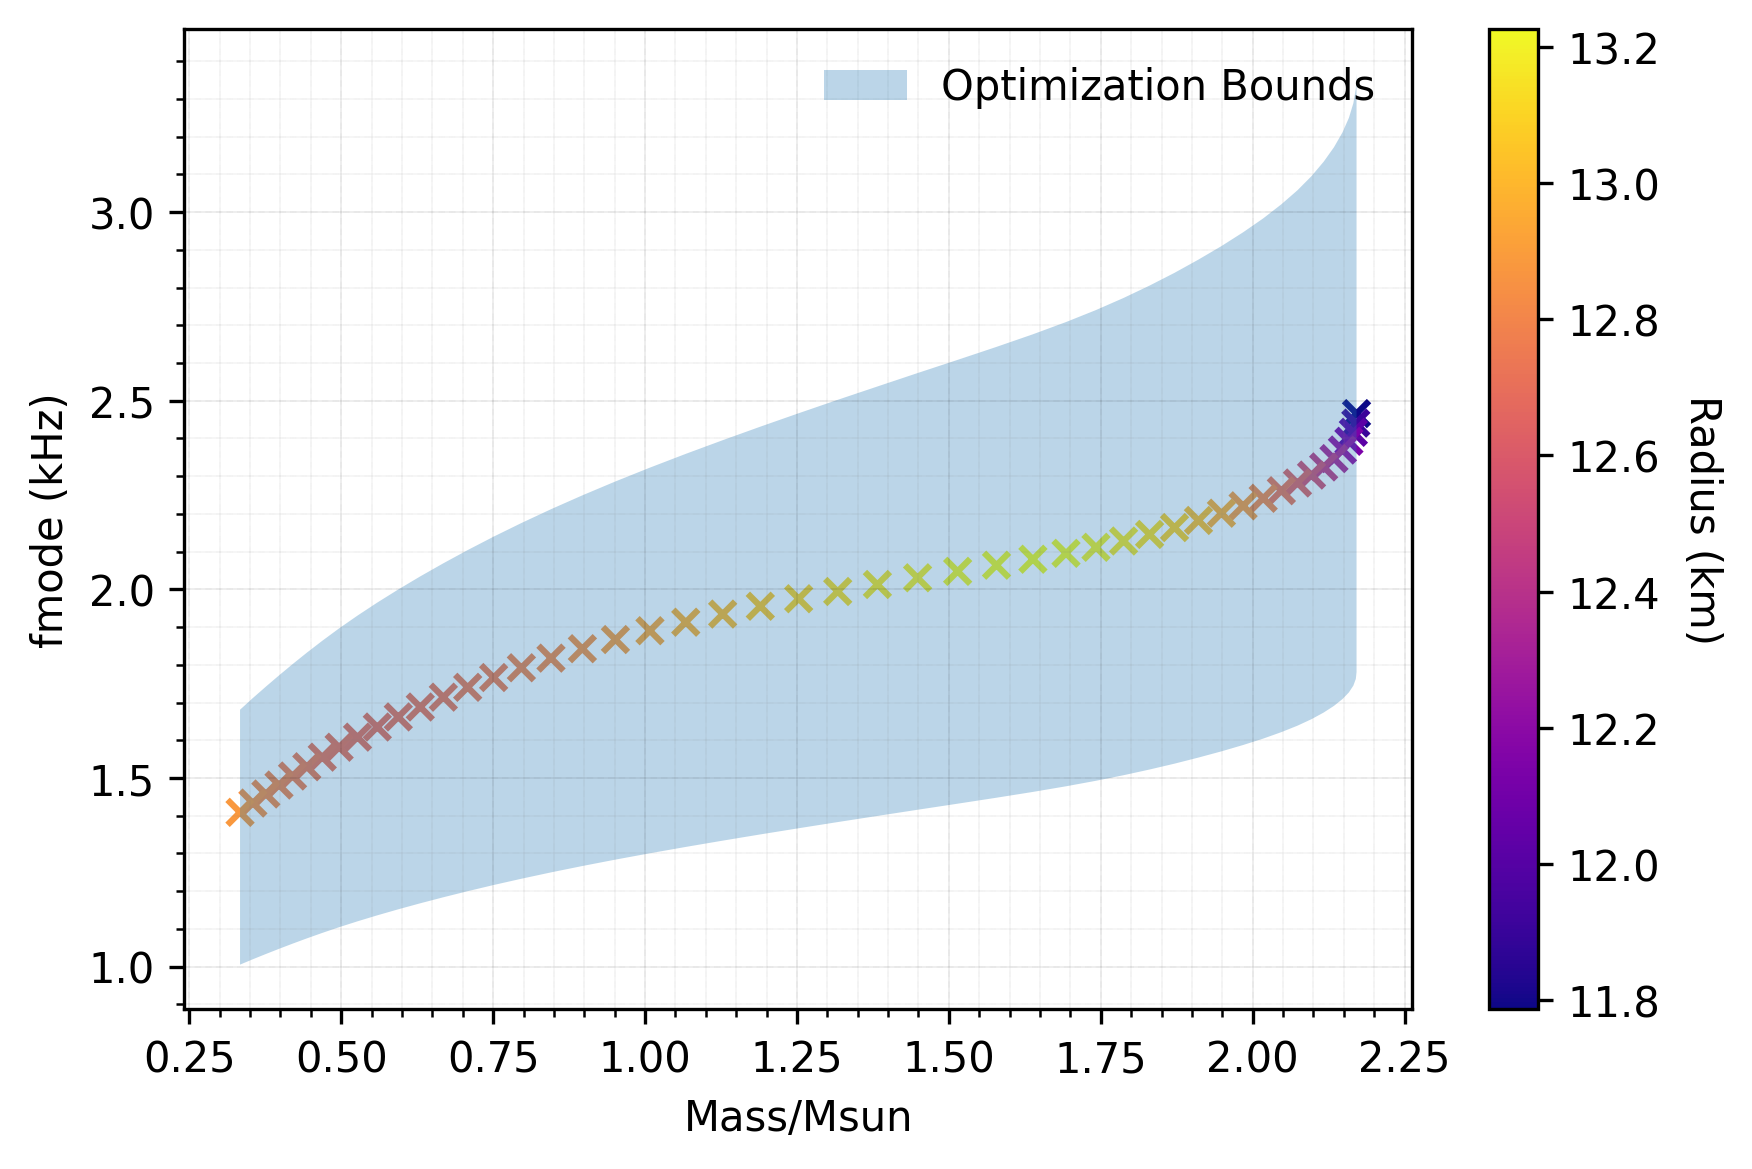

eos_6399


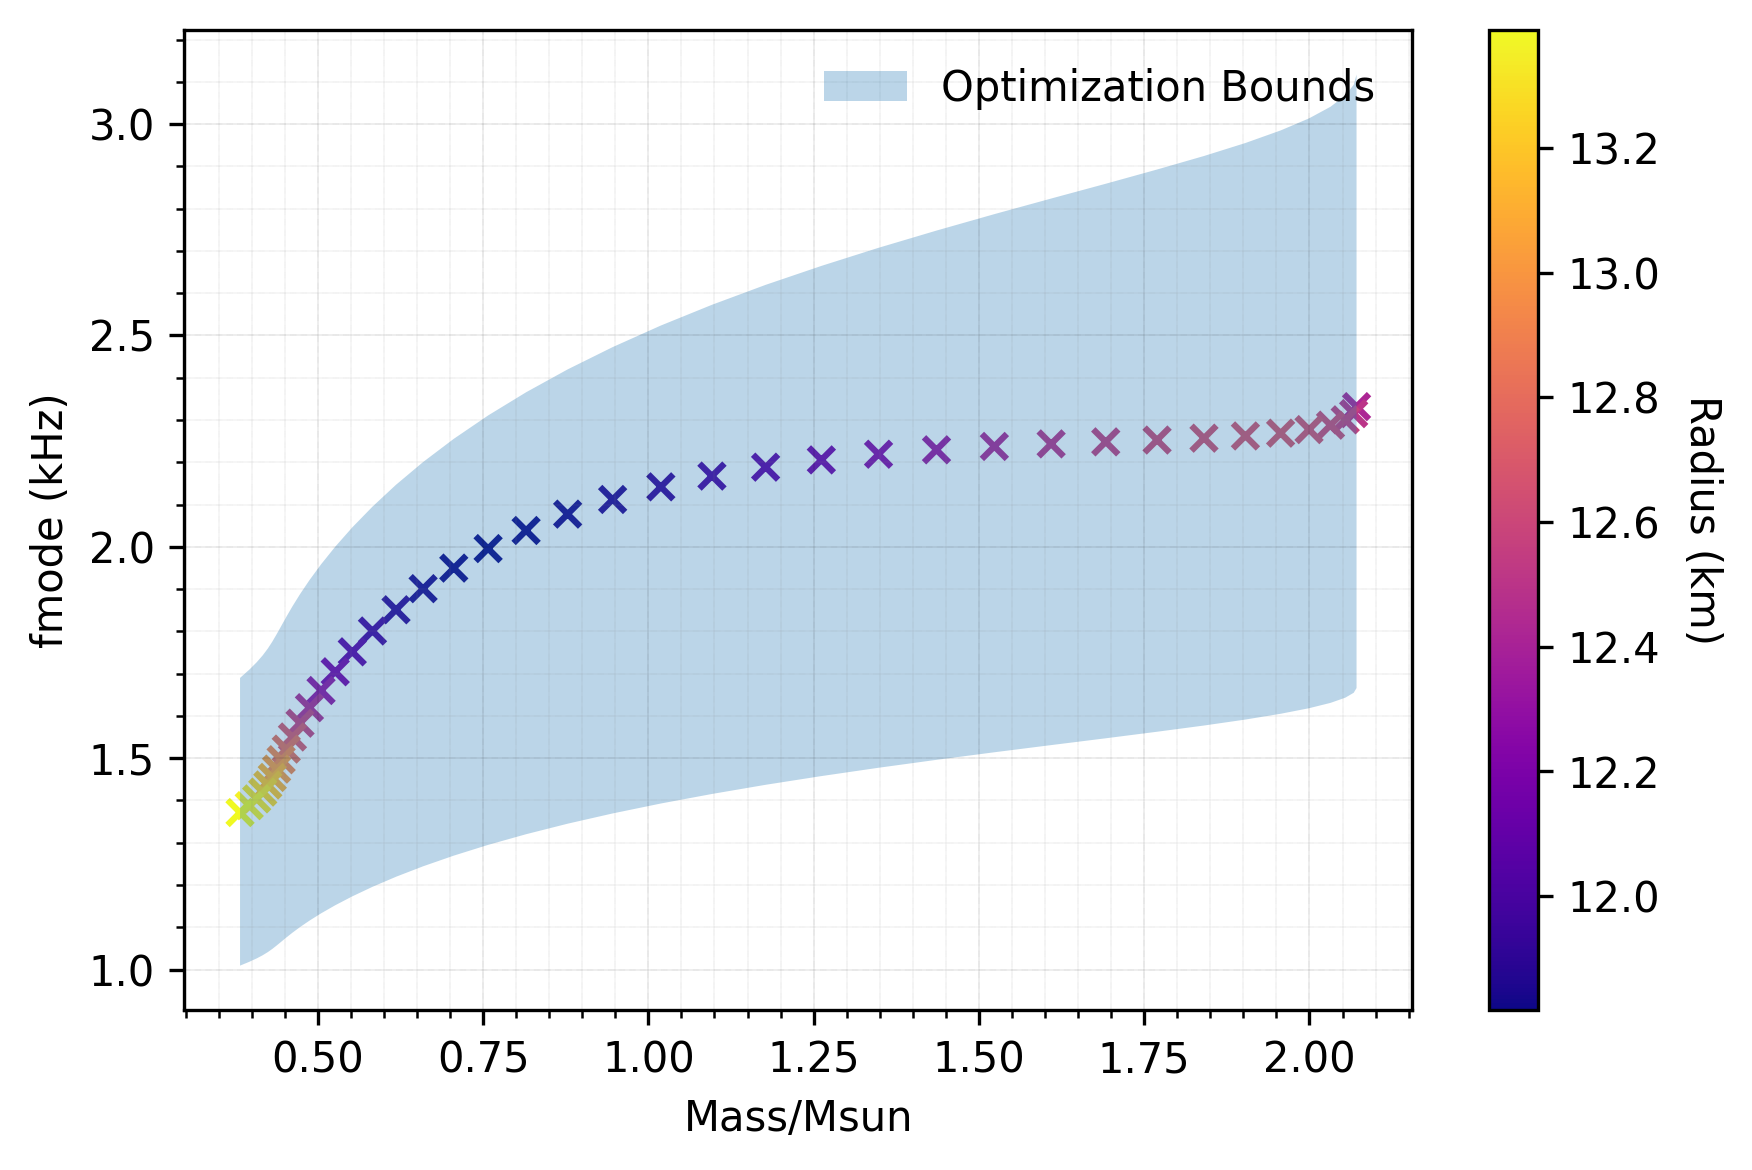

eos_7299


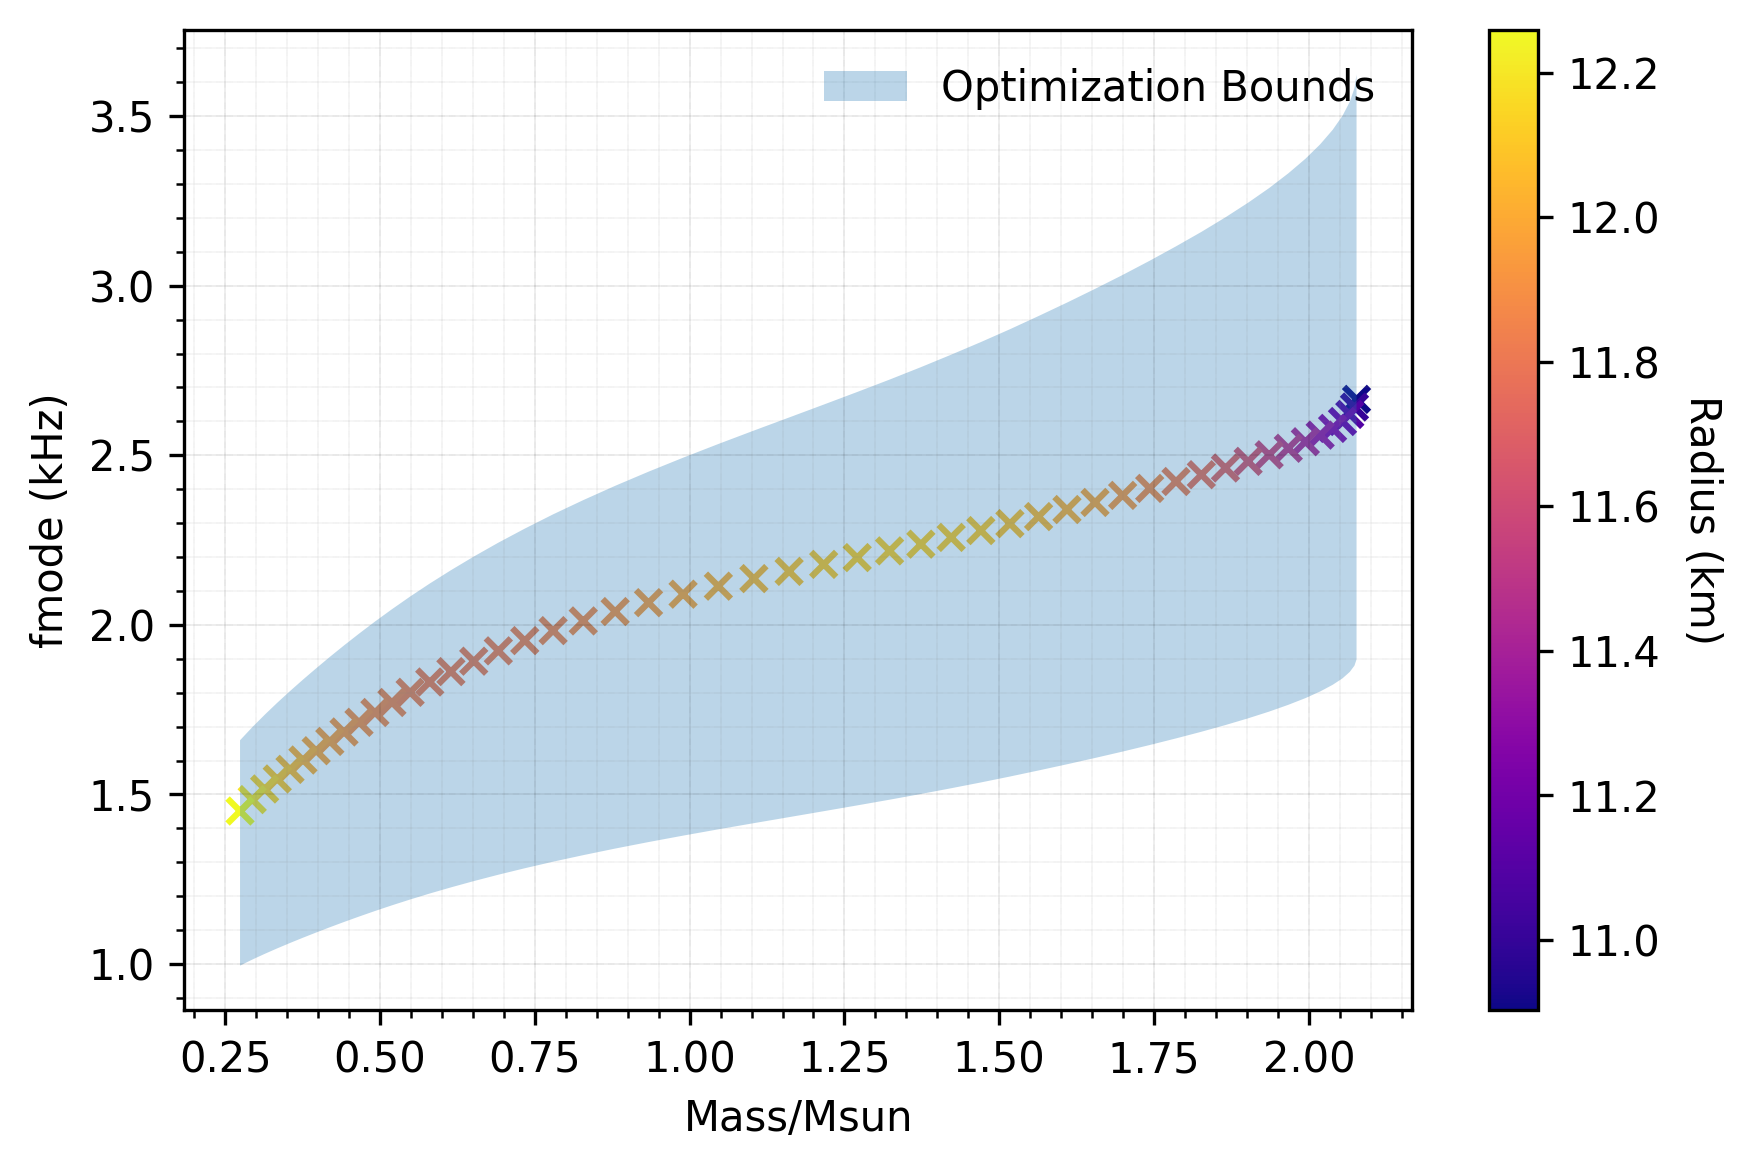

eos_8199


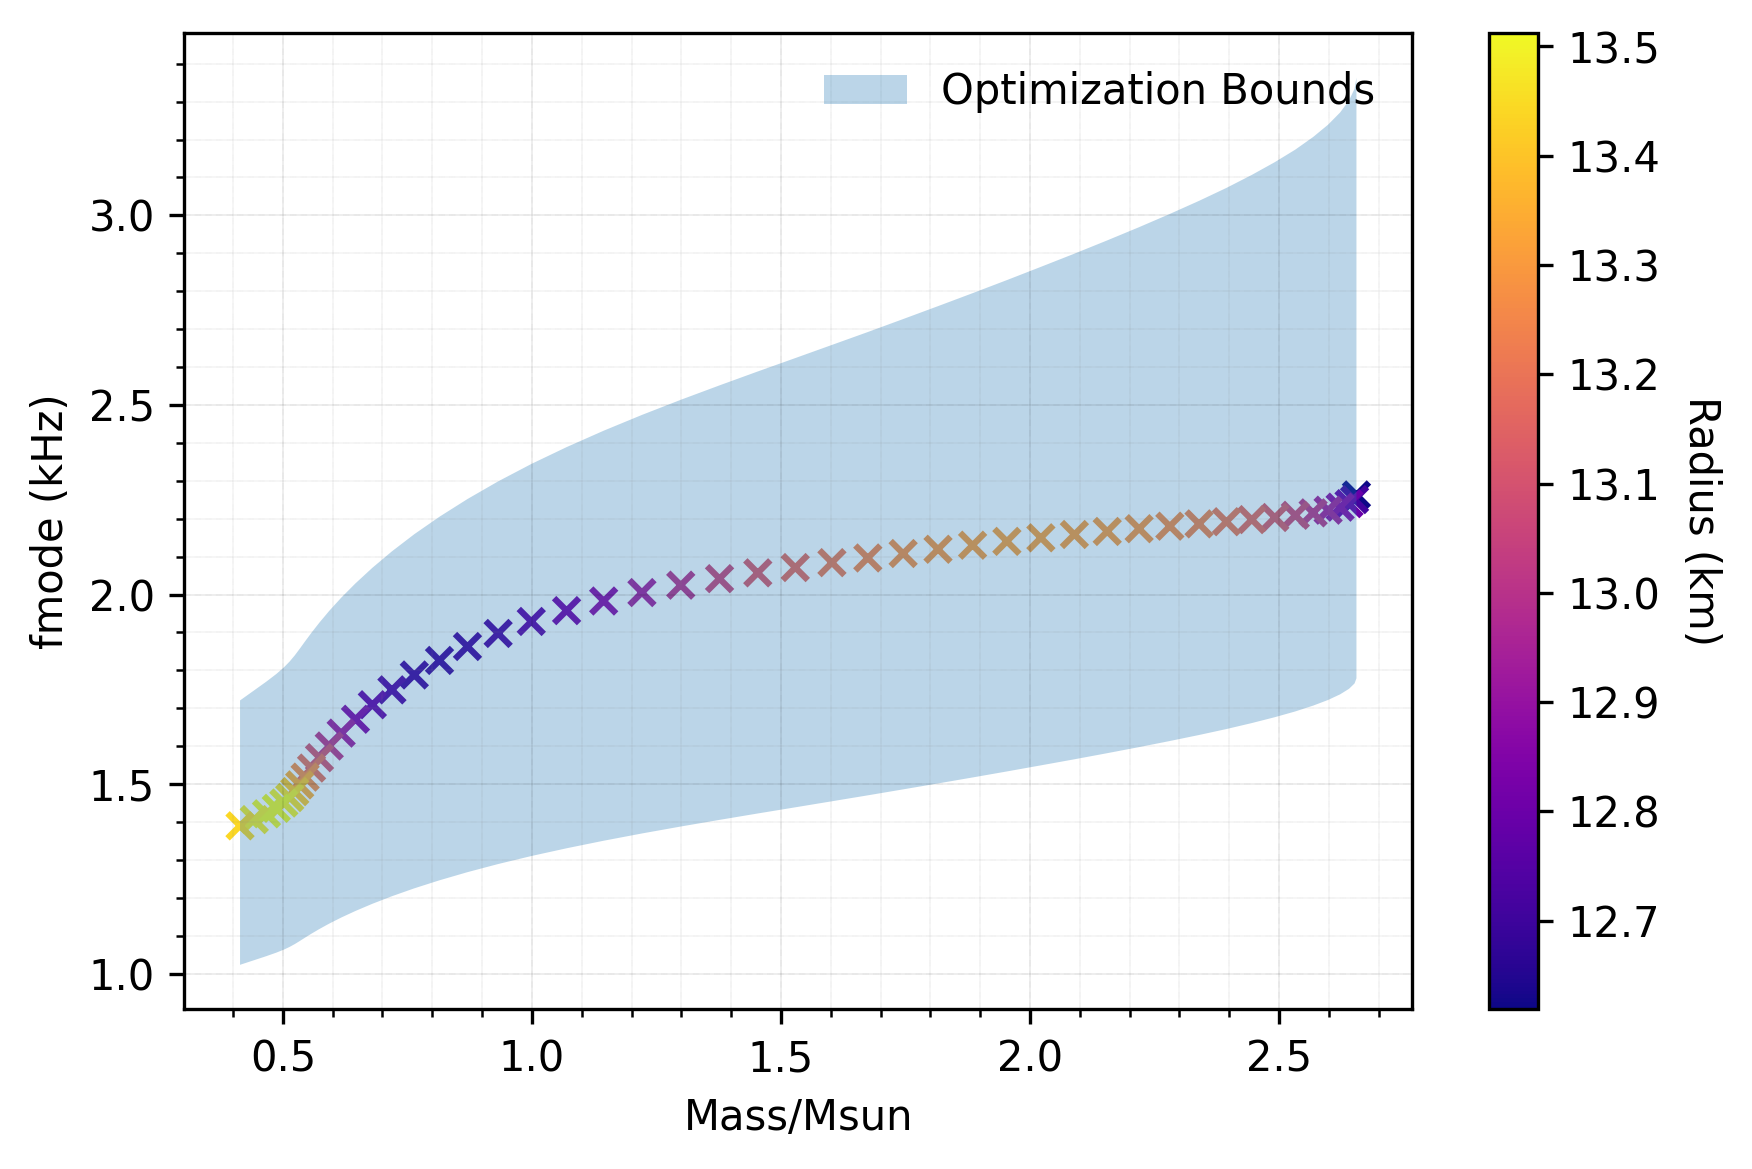

eos_9099


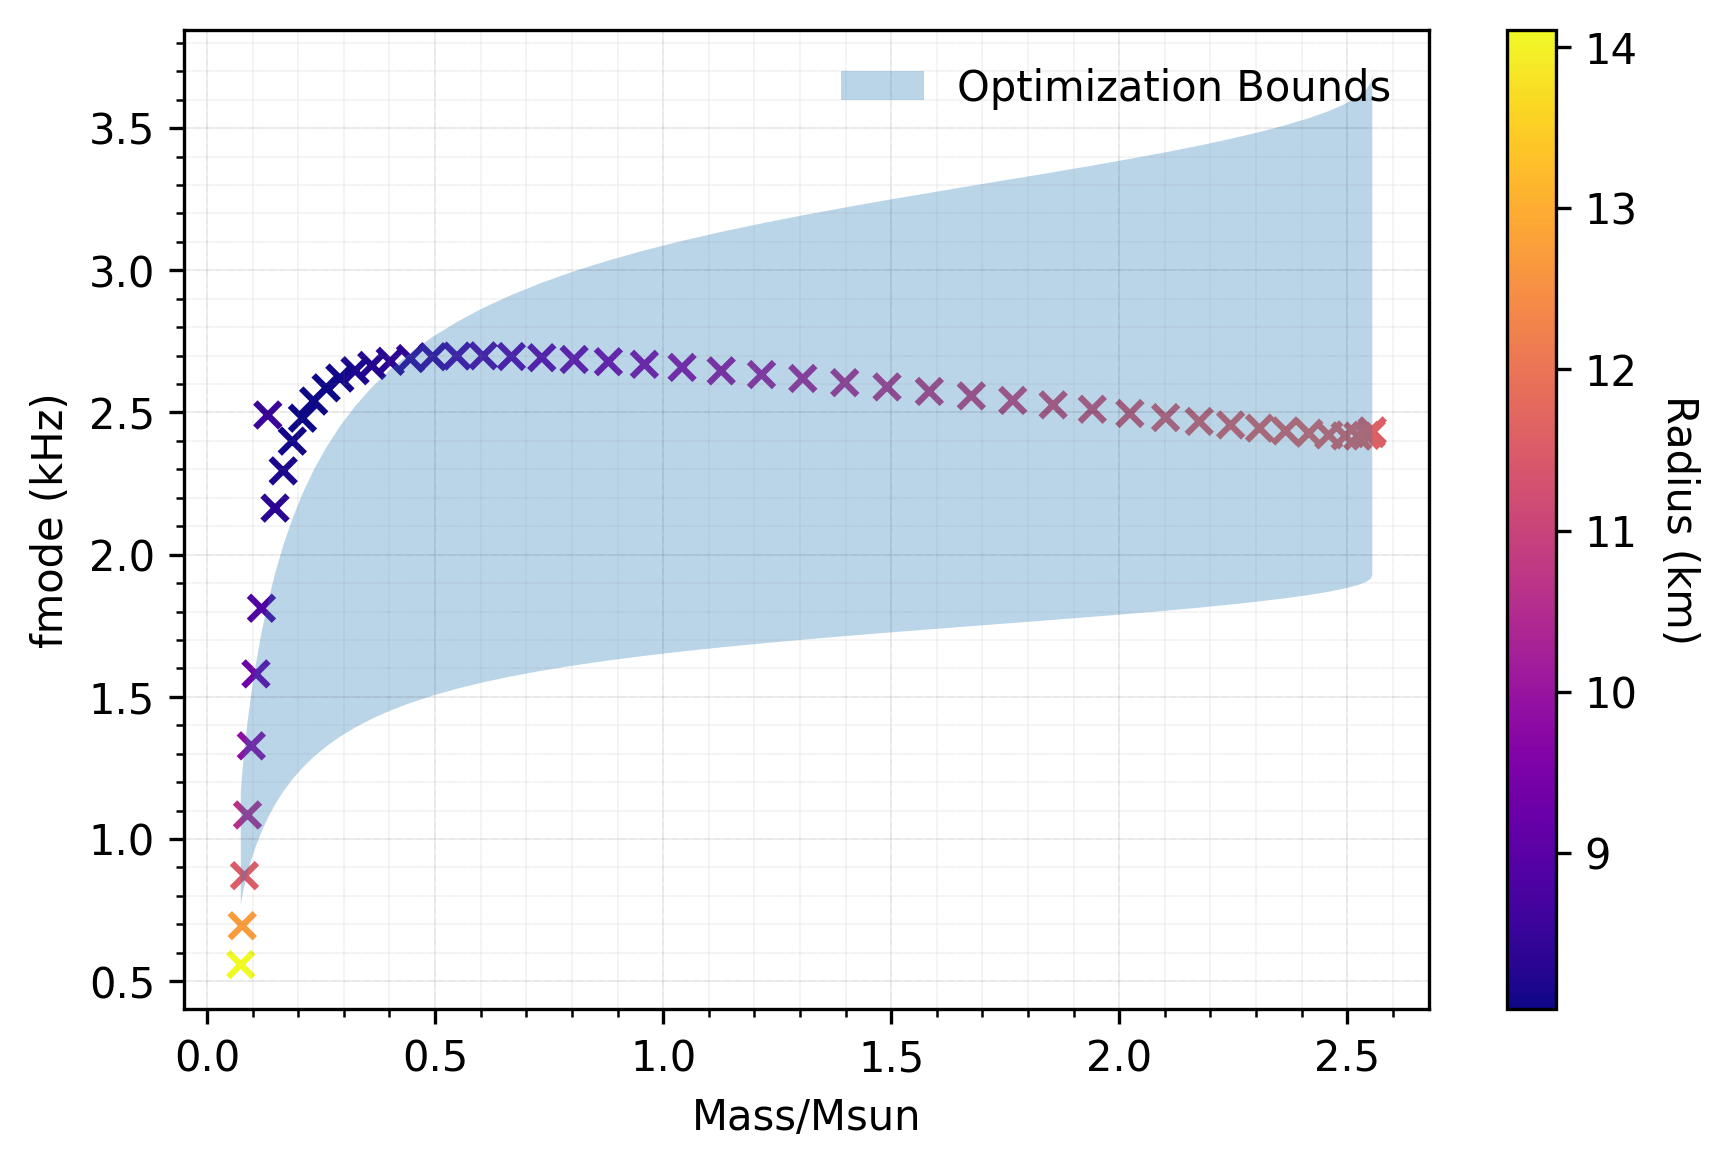


CPU times: user 15.8 s, sys: 1.12 s, total: 16.9 s
Wall time: 29min 2s


In [3]:
%%time
# for i in tqdm(range(0, len(names), 1000)):
for i in tqdm(range(1, len(names), 100)):
    fmodes1 = fmodes()
    eos_name = names[i]
    print(eos_name)
    fmodes1.set_EOS("/Users/utkarsh/PycharmProjects/fmodes/LCEHL_EOS_posterior_samples/" + eos_name + ".csv")
    fmodes1.parallel_simulation()
#     fmodes1.print_results()
    fmodes1.plot_fmass()

    res = np.array([fmodes1.mass_arr, fmodes1.radius_arr, fmodes1.f_mode_arr])
    np.savetxt("posterior_fmodes/"+eos_name+".csv", res.T, 
                   header = "mass,radius,fmode", 
                   comments = "", 
                  delimiter = ",")